# Dermatology Classification

This analysis covers a dataset from a study in a dermatology department. Following are the attributes used in it.

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)

1 Erythema

2 Scaling

3 definite borders

4 Itching

5 koebner phenomenon

6 polygonal papules

7 follicular papules

8 oral mucosal involvement

9 knee and elbow involvement

10 scalp involvement

11 family history (0 or 1)

34 Age

Histopathological Attributes: (take values 0, 1, 2, 3)

12 melanin incontinence

13 eosinophils in the infiltrate

14 PNL infiltrate

15 fibrosis of the papillary dermis

16 Exocytosis

17 Acanthosis

18 Hyperkeratosis

19 Parakeratosis

20 clubbing of the rete ridges

21 elongation of the rete ridges

22 thinning of the suprapapillary epidermis

23 spongiform pustule

24 munro microabcess

25 focal hypergranulosis

26 disappearance of the granular layer

27 vacuolisation and damage of basal layer

28 Spongiosis

29 saw-tooth appearance of retes

30 follicular horn plug

31 perifollicular parakeratosis

32 inflammatory monoluclear inflitrate

33 band-like infiltrate

This database contains 34 attributes. 35th is the class label, i.e. the disease name. The names and id numbers of the patients were removed from the database.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

from sklearn.feature_selection import SequentialFeatureSelector

In [7]:
df = pd.read_csv(r"C:\Users\stlp\Downloads\dermatology.csv")

In [9]:
df.head()

,Erythema\tScathing\tDefinite Borders\tItching\tKoebner \tPolygonal\tFollicular\tOral\tKnee\tScalp\tFamily Hostory\tMelanin\tEosinophils\tPNL\tFibrosis\tExocytosis\tAcanothosis\tHyperkeratosis\tParakeratosis\tClubbing\tElongation\tThinning\tSpongiform\tMunro\tFocal\tDisapperance\tVacuolisation\tSpongiosis\tRetes\tFollicular\tPerifollicular\tInflamatory\tBand-like\tAge\tDisease
0,2\t2\t0\t3\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t3...
1,3\t3\t3\t2\t1\t0\t0\t0\t1\t1\t1\t0\t0\t1\t0\t1...
2,2\t1\t2\t3\t1\t3\t0\t3\t0\t0\t0\t1\t0\t0\t0\t1...
3,2\t2\t2\t0\t0\t0\t0\t0\t3\t2\t0\t0\t0\t3\t0\t0...
4,2\t3\t2\t2\t2\t2\t0\t2\t0\t0\t0\t1\t0\t0\t0\t1...


In [11]:
df.columns[0]
header_string = 'Erythema\tScaling\tDefinite Borders\tItching\tKoebner\tPolygonal\tPapules\tOral\tKnee\tScalp\tFamily History\tMelanin\tEosinophils\tPNL\tFibrosis\tExocytosis\tAcanothosis\tHyperkeratosis\tParakeratosis\tClubbing\tElongation\tThinning\tSpongiform\tMunro\tFocal\tDisapperance\tVacuolisation\tSpongiosis\tRetes\tFollicular\tPerifollicular\tInflamatory\tBand-like\tAge\tDisease'

In [13]:
headers = header_string.split('\t')

In [15]:
# append all values to a list
rows = []
for i in df.iloc[:, 0]:
    rows.append(i)

# split row values
row_values = [row.split("\t") for row in rows]

In [17]:
# creat new data frame
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
data = pd.DataFrame(row_values, columns = headers)

In [19]:
# remove NaN
data = data[data['Age'] != '?'].reset_index()

In [21]:
# change type to int
for col in data.columns:
    data[col] = data[col].astype(int)

### Disease classification based on patient's age using gradient descent.

In [25]:
# initialize feature and target
X = data['Age'].values
Y = data['Disease'].values
m = len(Y)
num_Y = len(set(Y))

In [27]:
# encode disease values
Y_encode = pd.get_dummies(Y).astype(int).values

In [29]:
# initialize theta for each disease
# [intercept, slope]
theta = np.zeros((num_Y, 2))  

# number of iterations
iterations = 100

# learning rate
alpha = 0.0001

In [31]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [33]:
# prediction function
def y_pred(x, theta):
    return sigmoid(theta[0] + theta[1] * x)

In [35]:
# loss function
def loss(theta, x, y):
    pred = y_pred(x, theta)
    # small buffer to avoid undefined log(0)
    buffer = 1e-5  
    entropy_loss = (-1 / m) * (np.sum(y * np.log(pred + buffer) + (1 - y) * np.log(1 - pred + buffer)))
    return entropy_loss

In [37]:
# gradient descent algorithm
def gradient_descent(x, y, theta, alpha, iterations):
    # track losses
    losses = []

    for i in range(iterations):
        preds = y_pred(x, theta)
        err = preds - y
        
        # gradients
        gradient = np.zeros(2)
        gradient[0] = np.sum(err) / m
        gradient[1] = np.sum(err * x) / m
        
        # update theta
        theta = theta - alpha * gradient
        
        # record the cost
        losses.append(loss(theta, x, y))
        
    return theta, losses

In [39]:
# train model 
track_theta = np.zeros((num_Y, 2))
track_losses = []

for i in range(num_Y):
    itheta, ilosses = gradient_descent(X, Y_encode[:, i], np.zeros(2), alpha, iterations)
    track_theta[i] = itheta
    track_losses.append(ilosses)

In [41]:
def predict(x, thetas):
    # add intercept
    x_intercept = np.column_stack([np.ones_like(x), x])
    
    # probability for each disease
    prob = sigmoid(np.dot(x_intercept, thetas.T))
    
    # Choose the class with the highest probability
    predictions = np.argmax(prob, axis = 1) + 1
    
    return predictions

In [43]:
# make predictions
all_preds = predict(X, track_theta)

# accuracy of model
accuracy = np.mean(all_preds == Y) 
print("Accuracy:", accuracy)

Accuracy: 0.3100558659217877


#### Model Accuracy: 

Using only age as a predictor, this model achieves an accuracy of 31.01%

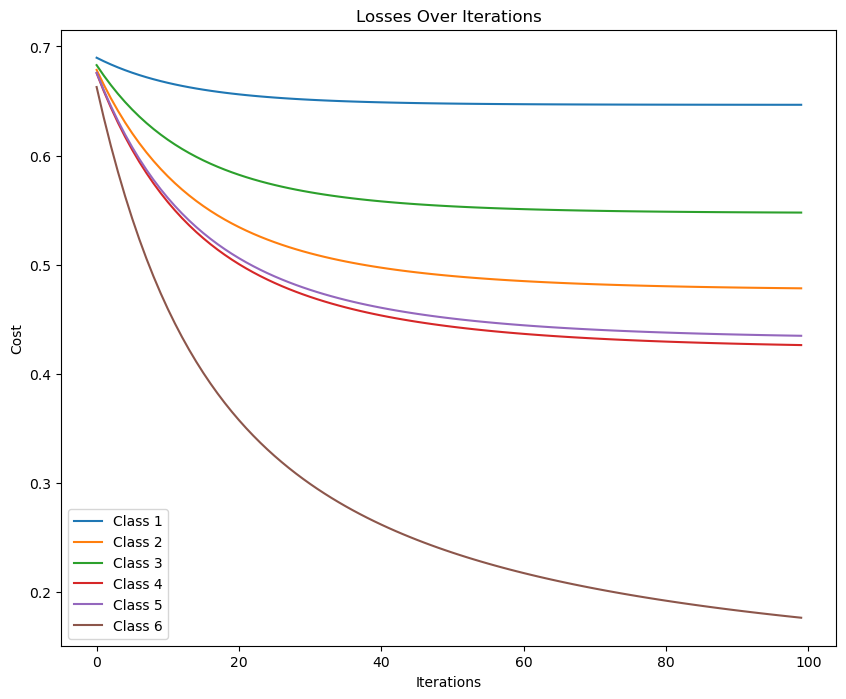

In [46]:
# Plot losses 
plt.figure(figsize = (10,8))
for i in range(num_Y):
    plt.plot(track_losses[i], label = f'Class {i + 1}')
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Losses Over Iterations')
plt.legend()
plt.show()

In [48]:
# plot decision boundaries function
def decision_boundaries(X, Y_encode, thetas, num_classes):
    plt.figure(figsize=(18, 12))
    
    for i in range(num_classes):
        plt.subplot(2, 3, i + 1)
        
        # plot points
        plt.scatter(X, Y_encode[:, i], marker='o', edgecolor='k', alpha = 0.8, c = Y_encode[:, i], cmap = 'cool')
        
        # Plot decision boundary
        x = np.linspace(X.min(), X.max(), 100)
        y = sigmoid(np.dot(np.column_stack([np.ones_like(x), x]), thetas[i].T))
        
        plt.plot(x, y, label = 'Decision Boundary', color = 'blue')
        plt.xlabel('Age')
        plt.ylabel('Probability')
        plt.title(f'Decision Boundary for Class {i + 1}')
        plt.legend()

    plt.tight_layout()
    plt.show()

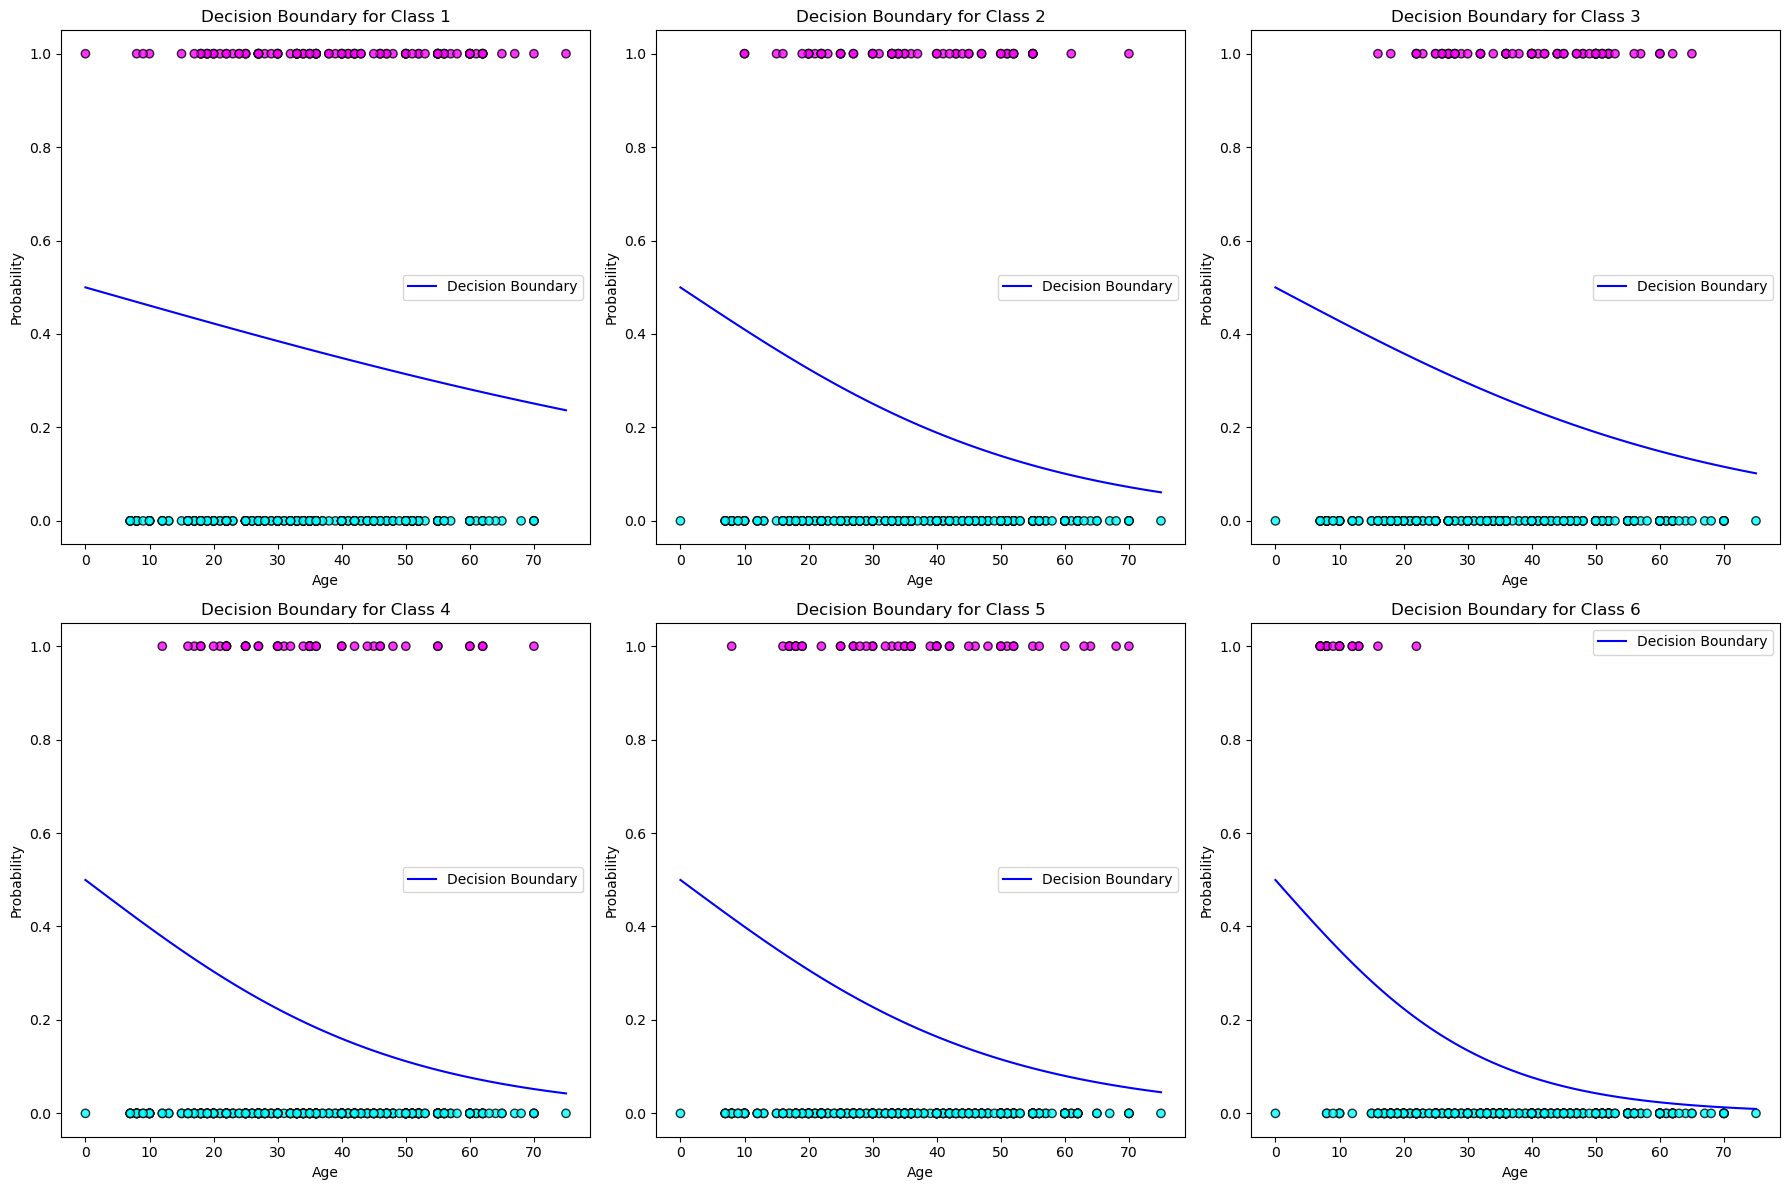

In [50]:
# plot decision boundaries for each disease class
decision_boundaries(X, Y_encode, track_theta, num_Y)

### Random Forest Classification Using Histopathological and Clinical Attributes

In [53]:
data2 = pd.get_dummies(data, dtype = 'int', columns = ['Disease'])

In [55]:
x = data2.drop(['Disease_1', 'Disease_2', 'Disease_3', 'Disease_4', 'Disease_5', 'Disease_6'], axis = 1)
scaler = StandardScaler()
x['Age'] = scaler.fit_transform(x[['Age']])

y = data2[['Disease_1', 'Disease_2', 'Disease_3', 'Disease_4', 'Disease_5', 'Disease_6']]

In [57]:
# random forest function
# randomly splits data into training (%70) and testing (%30)
# model itterates 50 times with different random states
# returns recorded accuracy scores
# returns first tree from last iteration for visualization (or other purposes)
def random_forest(X, Y):
    scores = []

    for i in range(50):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
        
        model = RandomForestClassifier()
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
    
        scores.append(accuracy_score(y_test, y_pred))

    sample_tree = model.estimators_[0]

    return scores, sample_tree

In [59]:
# assess model with clinical as well as histopathological attributes
accuracy_scores, tree = random_forest(x, y)

print('Mean random forest accuracy over 50 iterations:', np.mean(accuracy_scores))

Mean random forest accuracy over 50 iterations: 0.9474074074074074


#### Model Accuracy:

Over 50 iterations, Random Forest classification achieves a mean accuracy of 94.74%

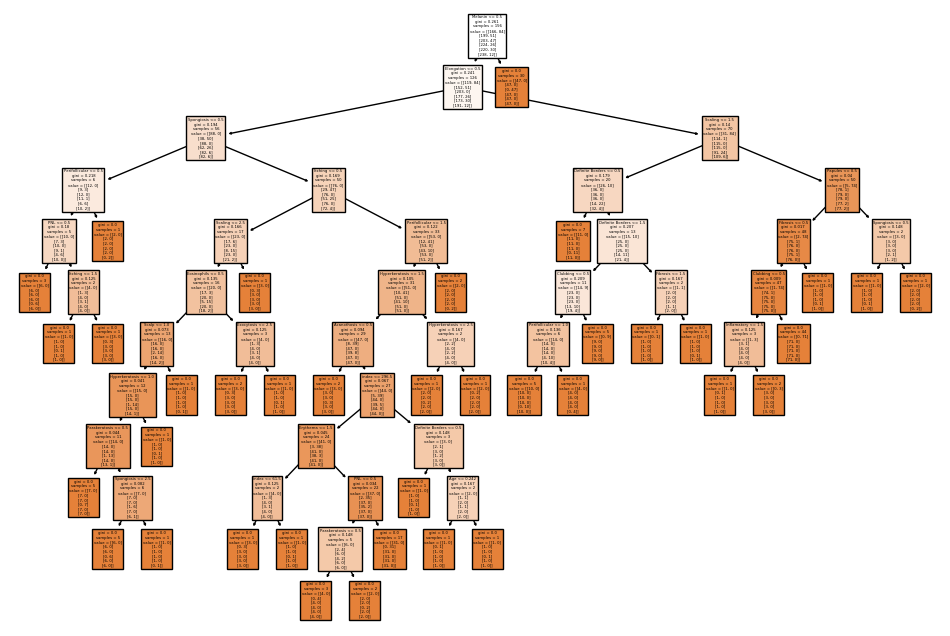

In [64]:
# plot sample tree
plt.figure(figsize = (12, 8))
plot_tree(tree, feature_names = x.columns, class_names = data['Age'].values, filled = True)
plt.show()

### K-Nearest Neighbors Classification Using Histopathological and Clinical Attributes

In [67]:
# THIS IMPLEMENTATION OF KNN CAN TAKE A WHILE!!
# ESPECIALLY THE SECOND PART

data3 = data.copy()

In [69]:
scaler = StandardScaler()
data3['Age'] = scaler.fit_transform(data3[['Age']])

x = data3.drop(['Disease'], axis=1)
y = data3['Disease']

In [71]:
# rounded sqrt of number of samples
# use as possible estimate for K
gen_k = round(np.sqrt(len(data3)))

In [75]:
## knn function
# randomly splits data into training (%70) and testing (%30)
# initializes model from k = 2 to k = estimate (sqrt(N)) + 5
# model itterates 100 times with different random states
# evaluates accuracy of each iteration
# returns mean accuracy of each model
def knn_classifier(X, Y, estimate):
    mean_accuracy = []

    for j in range(2, estimate + 5):
        scores = []

        for i in range(100):
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
            
            model = KNeighborsClassifier(n_neighbors = j).fit(x_train, y_train)
            
            # predictions
            y_pred = model.predict(x_test)
            
            # add accuracy of predictions to scores
            scores.append(accuracy_score(y_test, y_pred))

        # add mean accuracy of k to mean_accuracy
        mean_accuracy.append(np.mean(scores))

    return mean_accuracy

In [77]:
knn_results = knn_classifier(x, y, gen_k)

In [78]:
print('K-Neighbors:', np.argmax(knn_results) + 2)
print('Model Accuracy:', knn_results[np.argmax(knn_results)])

K-Neighbors: 2
Model Accuracy: 0.6922222222222223


#### Model Accuracy: 

With an optimal k = 2, this model achieves an accuracy of 69.22% over 100 iterations

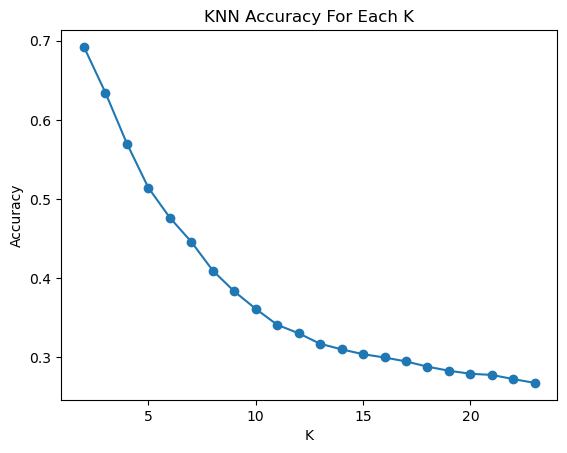

In [82]:
# plot accuracies
x = range(2, gen_k + 5)
y = knn_results

plt.plot(x, y, marker = 'o', linestyle = '-')
plt.title('KNN Accuracy For Each K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

#### KNN: Additional Tuning

Upon initial implementation, this KNN model's accuracy was less than I hoped for. To try to improve results, I using Sequential Feature Selection to determine the most important features to use for this model. This will be done by comparing the accuracy of models with the 33 (n-features - 1) through 17 (n-features / 2) best features. 

In [85]:
# knn feature selection function
# return selected fearutes and model accuracy of default knn model (k = 5) using sequential feature selection
# sfs implemented with a range of features, min_feature - max_feature
def knn_sfs_selection(X, Y, min_feature, max_feature):
    knn = KNeighborsClassifier()
    model_accuracy = []
    selected_features = []
    
    for i in range(min_feature, max_feature + 1):
        # select features for knn
        sfs = SequentialFeatureSelector(knn, n_features_to_select = i)
        sfs.fit(X, Y)
        features = X.columns[sfs.get_support()]
        test_features = X[features]
        
        # append feature names to selected features
        selected_features.append(features)

        # split data and train model
        x_train, x_test, y_train, y_test = train_test_split(test_features, y, test_size = 0.3, random_state = 16)
        knn.fit(x_train, y_train)

        y_pred = knn.predict(x_test)
        model_accuracy.append(accuracy_score(y_test, y_pred))

    return selected_features, model_accuracy

In [95]:
x = data3.drop(['Disease'], axis=1)
y = data3['Disease']

# half of features
min = round(len(x.columns) / 2)
# features - 1
max = len(x.columns) - 1

sfs_features, sfs_accuracy = knn_sfs_selection(x, y, min, max)

In [96]:
# select best features from sfs 
max_index = np.argmax(sfs_accuracy)
best_features = sfs_features[max_index]
print(best_features)

Index(['Koebner', 'Polygonal', 'Papules', 'Oral', 'Knee', 'Scalp',
       'Family History', 'Melanin', 'Fibrosis', 'Clubbing', 'Elongation',
       'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance',
       'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular', 'Perifollicular',
       'Band-like'],
      dtype='object')


In [97]:
# set x to best features 
# run classification again
x = data3[best_features]
knn_results = knn_classifier(x, y, gen_k)

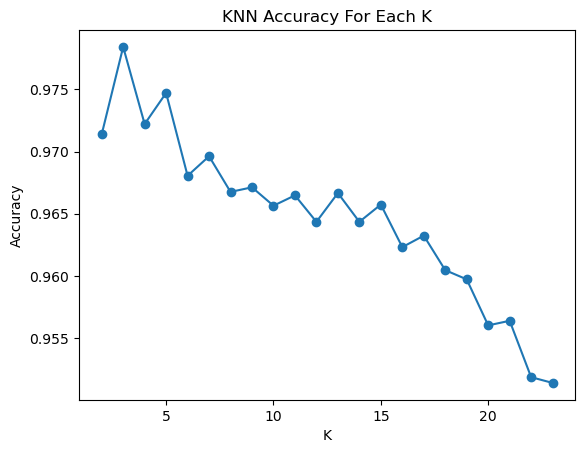

In [98]:
# plot accuracies
# revised model
x = range(2, gen_k + 5)
y = knn_results

plt.plot(x, y, marker = 'o', linestyle = '-')
plt.title('KNN Accuracy For Each K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.savefig('Midterm_KNN_Revised.png')
plt.show()

In [99]:
print('Best KNN Model Results')
print('Number of Features:', len(best_features))
print('K-Neighbors:', np.argmax(knn_results) + 2)
print('Model Accuracy:', knn_results[np.argmax(knn_results)])

Best KNN Model Results
Number of Features: 22
K-Neighbors: 3
Model Accuracy: 0.9784259259259261


#### Model Accuracy:

Using Sequential Feature Selection, this model uses 22 of the 34 attributes. With an optimal k = 3, this model achieves an accuracy of 97.84%

### KMeans and Agglomerative Clustering on Histopathological and Clinical Attributes

In [102]:
data4 = data.copy()

In [103]:
scaler = StandardScaler()

# adjusting model after poor initial performance and limited clustering
# drop disease from features
# scale all variables 
x = data4.drop(['Disease'], axis=1)
x = scaler.fit_transform(x)

y = data4['Disease']

In [104]:
# given that clustering models are not guarunteed to label clusters with the same labels as a given target,
# this function maps each disease cluster to the disease most present in the cluster
#
# takes cluster labels from a clustering algorithm and the target labels
# maps cluster labes to appropriate target 
# returns dataframe of cluster labels, target labels, and mapped labels 
def cluster_to_disease(cluster_labels, Y):
    # initialize dataframe of cluster label and their corresponding disease
    cluster_frame = pd.DataFrame({'Cluster': cluster_labels, 'Disease': Y})

    # count times each disease occures in each cluster
    counts = cluster_frame.groupby('Cluster')['Disease'].value_counts()
    counts = counts.reset_index(name = 'Count')

    # frame with highest counted disease in each cluster
    max = counts.loc[counts.groupby('Cluster')['Count'].idxmax()]

    cluster_frame['Cluster To Disease'] = 0

    for i in range(len(cluster_frame)):
        cluster = cluster_frame['Cluster'][i]
        
        # disease for the current cluster
        disease = max.loc[max['Cluster'] == cluster, 'Disease'].values[0]
        cluster_frame.at[i, 'Cluster To Disease'] = disease

    return cluster_frame

#### KMeans

In [106]:
# cluster data with kmeans 
# since 6 diseases, set cluster amount to 6
# get cluster for each value
# not necessarily ordered
kmeans = KMeans(n_clusters = 6, random_state = 16, n_init = 'auto').fit(x)
kmeans_clusters = kmeans.labels_

C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [107]:
kmeans_results = cluster_to_disease(kmeans_clusters, y)
kmeans_accuracy = (np.sum(kmeans_results['Cluster To Disease'] == kmeans_results['Disease']) / len(kmeans_results))
print('KMeans Model Accuracy:', kmeans_accuracy)

KMeans Model Accuracy: 0.8100558659217877


#### Model Accuracy:

This model achieves an accuracy of 81.01% using 6 clusters.

#### Agglomerative

In [111]:
# cluster data with agglomerative clustering
# since 6 diseases, set cluster amount to 6
# get cluster for each value
# not necessarily ordered
agglo = AgglomerativeClustering(n_clusters = 6, random_state = 16).fit(x)
agglo_clusters = agglo.labels_

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'random_state'

In [ ]:
agglo_results = cluster_to_disease(agglo_clusters, y)
agglo_accuracy = (np.sum(agglo_results['Cluster To Disease'] == agglo_results['Disease']) / len(agglo_results))
print('Agglomerative Model Accuracy:', agglo_accuracy)

#### Model Accuracy: 



In [ ]:
# visualization of clusters function
def plot_clusters(cluster_frame, X, model_type_name):
    # decomposition for clustering 2D visualization
    # chooses to most important variables
    principle = PCA(n_components = 2)
    data_principle = principle.fit_transform(X)

    # frame of principle variables and mapped clusters to target variables 
    df_principle = pd.DataFrame(data_principle, columns = ['PC1', 'PC2'])
    df_principle['Disease'] = cluster_frame['Cluster To Disease']

    # plot clusters
    sns.scatterplot(data = df_principle, x = 'PC1', y = 'PC2', hue = 'Disease', palette = 'cool')
    plt.title(f'{model_type_name} Clustering of Dermatology Data')

    # general cluster areas
    for cluster in np.unique(df_principle['Disease']):
        cluster_data = df_principle[df_principle['Disease'] == cluster]
        ellipse = patches.Ellipse(cluster_data[['PC1', 'PC2']].mean().values,
                                  width = cluster_data['PC1'].std() * 4,
                                  height = cluster_data['PC2'].std() * 4,
                                  edgecolor = 'black', 
                                  facecolor = 'none', 
                                  linestyle = '--', 
                                  linewidth = 1)
        plt.gca().add_patch(ellipse)
    
    plt.show()

In [ ]:
plot_clusters(kmeans_results, x, 'KMeans')
plot_clusters(agglo_results, x, 'Agglomerative')